In [169]:
from PIL import Image

def read_image_pixel_values(image_path):
    try:
        img = Image.open(image_path)
        width, height = img.size
        pixel_values = []

        for y in range(height):
            row_values = []
            for x in range(width):
                pixel = img.getpixel((x, y))

                # Check if pixel is white (255, 255, 255) and change it to 0
                if pixel == (255, 255, 255, 255):
                    pixel = 0
                # Check if pixel is blue (0, 0, 255) and change it to 1
                elif pixel == (0, 0, 0, 255):
                    pixel = 1

                row_values.append(pixel)
            pixel_values.append(row_values)

        return img, pixel_values

    except Exception as e:
        print(f"Error: {e}")
        return None, None

if __name__ == "__main__":
    base = [
        [0] * 20 for _ in range(20)
    ]  # Initialize the "base" weight matrix with 20 rows and 20 columns, all set to 0
    bias = 9

    # The classification results for each image
    result = [
        "Lingkaran", "Lingkaran", "Lingkaran", "Kotak", "Kotak", "Kotak", "Lingkaran",
        "Lingkaran", "Lingkaran", "Kotak", "Kotak", "Kotak", "Lingkaran", "Lingkaran",
        "Lingkaran", "Kotak", "Kotak", "Kotak"
    ]

    for x in range(3):
        for image_index in range(18):
            image_path = "D:\\MAH_CODE\\PYTHON\\YT\\dataset\\{}.png".format(image_index + 1)
            img, matrix = read_image_pixel_values(image_path)
            final = 0
            istrue = True
            
            if img and matrix:
                # Calculate the dot product of the image matrix and the base weight matrix
                    
                tf = 0
                for i in range(len(matrix)):
                    for j in range(len(matrix[0])):
                        final = (matrix[i][j] * base[i][j])
                        tf += final
                print(tf)

                # Determine the classification (Lingkaran or Kotak) based on the dot product
                if tf < bias:
                    math_result = "Lingkaran"
                elif tf > bias:
                    math_result = "Kotak"  
                else:
                    math_result = result[image_index]

                # Perform weight update based on classification result
                if math_result != result[image_index] and istrue:
                    for i in range(len(matrix)):
                        for j in range(len(matrix[0])):
                            base[i][j] += matrix[i][j]
                elif math_result != result[image_index] and not istrue:
                    for i in range(len(matrix)):
                        for j in range(len(matrix[0])):
                            base[i][j] -= matrix[i][j]
                else:
                    istrue = True
        else:
            print(f"Failed to read image_{image_index + 1}.png or invalid image path.")

    print("Final base matrix:")
    for row in base:
        print(row)


0
0
0
0
0
14
52
134
18
104
131
162
208
39
310
84
472
54
Failed to read image_18.png or invalid image path.
235
295
113
165
473
134
189
750
44
192
404
474
712
149
823
171
1030
104
Failed to read image_18.png or invalid image path.
528
666
226
264
820
254
326
1366
70
280
677
786
1216
259
1336
258
1588
154
Failed to read image_18.png or invalid image path.
Final base matrix:
[0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0]
[0, 1, 1, 3, 3, 6, 4, 4, 7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 0]
[0, 1, 3, 3, 6, 9, 12, 10, 10, 10, 7, 7, 10, 7, 7, 4, 4, 4, 4, 0]
[0, 3, 3, 6, 9, 12, 12, 12, 10, 12, 12, 12, 10, 10, 7, 7, 4, 4, 4, 3]
[0, 3, 6, 9, 12, 12, 12, 14, 12, 12, 12, 15, 12, 12, 10, 7, 7, 4, 4, 3]
[0, 3, 9, 9, 12, 12, 12, 14, 12, 12, 12, 15, 15, 12, 10, 7, 7, 4, 4, 3]
[0, 4, 9, 12, 12, 12, 14, 12, 12, 12, 12, 12, 15, 15, 12, 7, 7, 7, 4, 0]
[0, 4, 7, 12, 12, 12, 12, 14, 14, 14, 14, 14, 15, 15, 12, 7, 7, 7, 4, 0]
[0, 3, 6, 9, 9, 9, 13, 13, 13, 13, 13, 13, 13, 11, 11, 6, 6, 3, 0, 0]
[0, 3, 

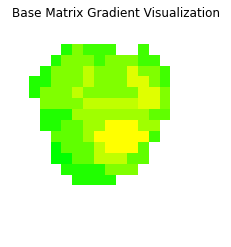

In [176]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap



base = [0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0],[0, 1, 1, 3, 3, 6, 4, 4, 7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 0],[0, 1, 3, 3, 6, 9, 12, 10, 10, 10, 7, 7, 10, 7, 7, 4, 4, 4, 4, 0],[0, 3, 3, 6, 9, 12, 12, 12, 10, 12, 12, 12, 10, 10, 7, 7, 4, 4, 4, 3],[0, 3, 6, 9, 12, 12, 12, 14, 12, 12, 12, 15, 12, 12, 10, 7, 7, 4, 4, 3],[0, 3, 9, 9, 12, 12, 12, 14, 12, 12, 12, 15, 15, 12, 10, 7, 7, 4, 4, 3],[0, 4, 9, 12, 12, 12, 14, 12, 12, 12, 12, 12, 15, 15, 12, 7, 7, 7, 4, 0],[0, 4, 7, 12, 12, 12, 12, 14, 14, 14, 14, 14, 15, 15, 12, 7, 7, 7, 4, 0],[0, 3, 6, 9, 9, 9, 13, 13, 13, 13, 13, 13, 13, 11, 11, 6, 6, 3, 0, 0],[0, 3, 3, 9, 9, 11, 11, 13, 13, 16, 16, 16, 13, 13, 3, 3, 3, 3, 0, 0],[0, 3, 3, 6, 11, 11, 11, 13, 16, 16, 16, 16, 16, 10, 5, 3, 3, 3, 0, 0],[0, 0, 3, 5, 8, 11, 11, 11, 14, 16, 16, 16, 11, 5, 5, 5, 3, 0, 0, 0],[0, 0, 0, 5, 8, 8, 11, 11, 14, 14, 14, 11, 11, 5, 5, 5, 3, 0, 0, 0],[0, 1, 1, 3, 6, 9, 9, 9, 9, 12, 12, 12, 5, 5, 5, 5, 0, 0, 0, 0],[0, 1, 1, 3, 3, 6, 9, 9, 9, 9, 6, 6, 5, 5, 5, 2, 0, 0, 0, 0],[0, 1, 4, 6, 6, 3, 3, 3, 6, 6, 6, 6, 5, 2, 2, 2, 0, 0, 0, 0],[0, 4, 4, 4, 6, 6, 3, 3, 3, 3, 3, 3, 2, 2, 2, 0, 0, 0, 0, 0],[0, 4, 4, 4, 4, 6, 3, 3, 3, 3, 3, 3, 2, 2, 0, 0, 0, 0, 0, 0],[0, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0],[0, 0, 3, 3, 3, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0]
base_np = np.array(base)

blue_color = [0, 0, 1]  # Blue
green_color = [0, 1, 0]  # Green
yellow_color = [1, 1, 0]  # Yellow

# Create a custom colormap that smoothly interpolates between blue and yellow
colors = [blue_color, green_color, yellow_color]
gradient_cmap = LinearSegmentedColormap.from_list("GradientCmap", colors, N=256)

# Normalize the base matrix to a range between -5 and 5
normalized_base = np.interp(base_np, (base_np.min(), base_np.max()), (-5, 5))

# Initialize an empty RGB image to store the color gradient
gradient_img = np.zeros((len(base), len(base[0]), 3))

# Apply the custom colormap based on the normalized weight values
for i in range(len(base)):
    for j in range(len(base[0])):
        value = normalized_base[i][j]
        color = gradient_cmap((value + 5) / 10)  # Map the normalized value to the colormap range
        gradient_img[i, j] = color[:3]  # Take only the first three elements (RGB)

# Show the gradient image using matplotlib
plt.imshow(gradient_img)
plt.title("Base Matrix Gradient Visualization")
plt.axis("off")  # Hide the axes
plt.show()

In [171]:
from PIL import Image

def read_image_pixel_values(image_path):
    try:
        img = Image.open(image_path)
        width, height = img.size
        pixel_values = []

        for y in range(height):
            row_values = []
            for x in range(width):
                pixel = img.getpixel((x, y))

                # Check if pixel is white (255, 255, 255) and change it to 0
                if pixel == (255, 255, 255, 255):
                    pixel = 0
                # Check if pixel is blue (0, 0, 255) and change it to 1
                elif pixel == (0, 0, 0, 255):
                    pixel = 1

                row_values.append(pixel)
            pixel_values.append(row_values)

        return img, pixel_values

    except Exception as e:
        print(f"Error: {e}")
        return None, None

if __name__ == "__main__":
    bias = 9
    base = [0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0],[0, 1, 1, 3, 3, 6, 4, 4, 7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 0],[0, 1, 3, 3, 6, 9, 12, 10, 10, 10, 7, 7, 10, 7, 7, 4, 4, 4, 4, 0],[0, 3, 3, 6, 9, 12, 12, 12, 10, 12, 12, 12, 10, 10, 7, 7, 4, 4, 4, 3],[0, 3, 6, 9, 12, 12, 12, 14, 12, 12, 12, 15, 12, 12, 10, 7, 7, 4, 4, 3],[0, 3, 9, 9, 12, 12, 12, 14, 12, 12, 12, 15, 15, 12, 10, 7, 7, 4, 4, 3],[0, 4, 9, 12, 12, 12, 14, 12, 12, 12, 12, 12, 15, 15, 12, 7, 7, 7, 4, 0],[0, 4, 7, 12, 12, 12, 12, 14, 14, 14, 14, 14, 15, 15, 12, 7, 7, 7, 4, 0],[0, 3, 6, 9, 9, 9, 13, 13, 13, 13, 13, 13, 13, 11, 11, 6, 6, 3, 0, 0],[0, 3, 3, 9, 9, 11, 11, 13, 13, 16, 16, 16, 13, 13, 3, 3, 3, 3, 0, 0],[0, 3, 3, 6, 11, 11, 11, 13, 16, 16, 16, 16, 16, 10, 5, 3, 3, 3, 0, 0],[0, 0, 3, 5, 8, 11, 11, 11, 14, 16, 16, 16, 11, 5, 5, 5, 3, 0, 0, 0],[0, 0, 0, 5, 8, 8, 11, 11, 14, 14, 14, 11, 11, 5, 5, 5, 3, 0, 0, 0],[0, 1, 1, 3, 6, 9, 9, 9, 9, 12, 12, 12, 5, 5, 5, 5, 0, 0, 0, 0],[0, 1, 1, 3, 3, 6, 9, 9, 9, 9, 6, 6, 5, 5, 5, 2, 0, 0, 0, 0],[0, 1, 4, 6, 6, 3, 3, 3, 6, 6, 6, 6, 5, 2, 2, 2, 0, 0, 0, 0],[0, 4, 4, 4, 6, 6, 3, 3, 3, 3, 3, 3, 2, 2, 2, 0, 0, 0, 0, 0],[0, 4, 4, 4, 4, 6, 3, 3, 3, 3, 3, 3, 2, 2, 0, 0, 0, 0, 0, 0],[0, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0],[0, 0, 3, 3, 3, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0]
    # The classification results for each image
    result = [
        "Lingkaran", "Lingkaran", "Lingkaran", "Kotak", "Kotak", "Kotak", "Lingkaran",
        "Lingkaran", "Lingkaran", "Kotak", "Kotak", "Kotak", "Lingkaran", "Lingkaran",
        "Lingkaran", "Kotak", "Kotak", "Kotak"
    ]

    image_path = "D:\\MAH_CODE\\PYTHON\\YT\\dataset\\1.png"
    img, matrix = read_image_pixel_values(image_path)

    if img and matrix:
        # Calculate the dot product of the image matrix and the base weight matrix
       

        for row in matrix:
            print(row)
                
        for i in range(len(matrix)):
            for j in range(len(matrix[0])):
                final = (matrix[i][j] * base[i][j]) 
                # print(matrix[i][j])
                # print(base[i][j])
                # print(final)
                tf = tf + final

        print(tf)

        # Determine the classification (Lingkaran or Kotak) based on the dot product
        if tf < bias:
            math_result = "Lingkaran"
        else:
            math_result = "Kotak"    

        print(math_result)           
    else:
        print(f"Failed to read image_{image_index + 1}.png or invalid image path.")


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0,